## Storytelling Through Data Visualization - Aesthetics

### 1. Improving Plot Aesthetics
- a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012

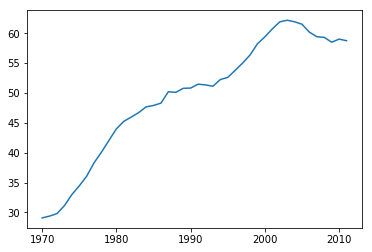

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

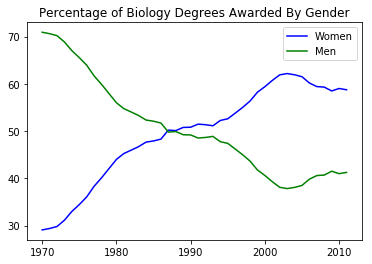

In [2]:
# Visualizing The Gender Gap
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### Data-Ink Ratio -- minimize the chartjunk
- To improve the data-ink ratio: 
- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.

In [4]:
# Hiding Tick Marks -- Axes.tick_params()

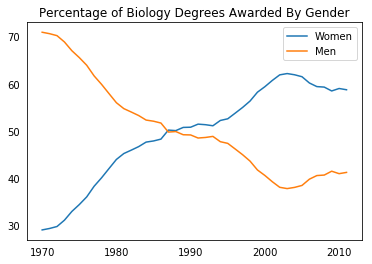

In [5]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
# same as above chart
ax.tick_params(bottom="off", top="off", left="off", right="off")
# off all the rick marks
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")
plt.show()

In [6]:
# Hiding Spines:
# access each Spine object in the dictionary
# call the Spine.set_visible() method
# pass in the Boolean value False

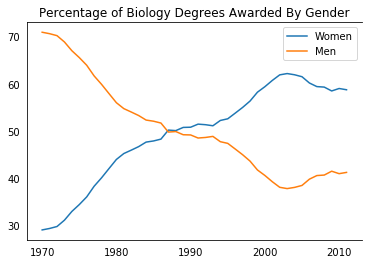

In [9]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
# off the right bin -- only one side
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

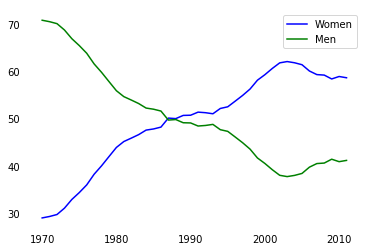

In [10]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
# Start solution code.
for key,spine in ax.spines.items():
    spine.set_visible(False)
# End solution code.
ax.legend(loc='upper right')
plt.show()

### Comparing Gender Gap Across Degree Categories

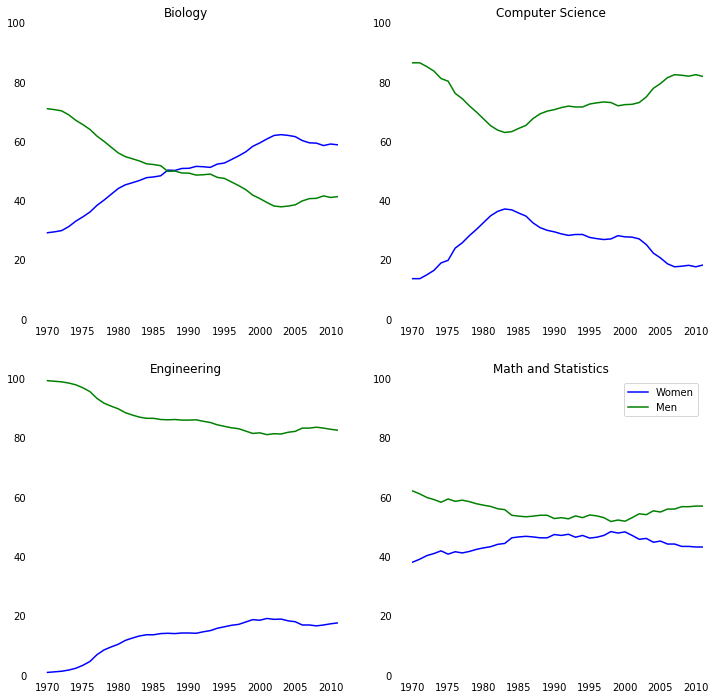

In [11]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

- The gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small.

### 2.  Color, Layout, and Annotations

- Color blindness issue
- Setting Line Color Using RGB: colorblind friendly (red:0, green:107,blue:164)

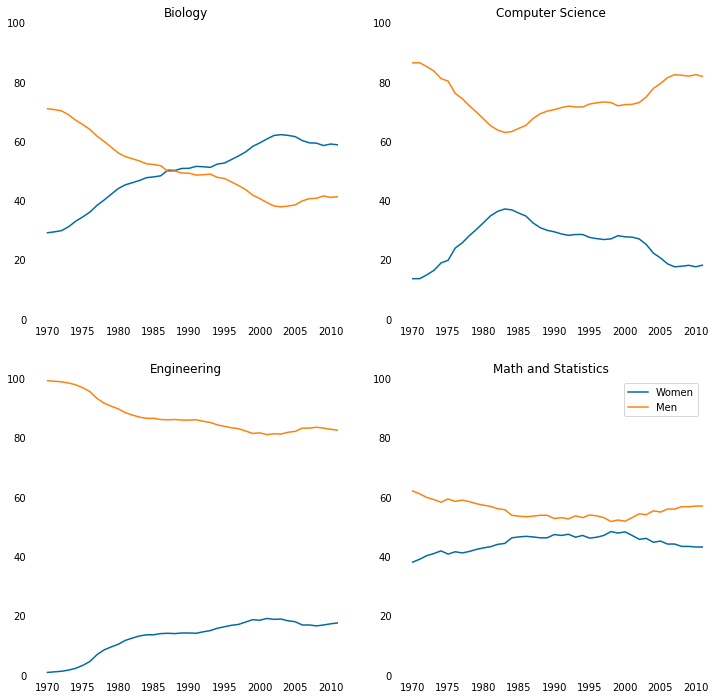

In [12]:
# set the cb color -- RGB value of (0, 107, 164))/(255, 128, 14)
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

In [13]:
#  Setting Line Width

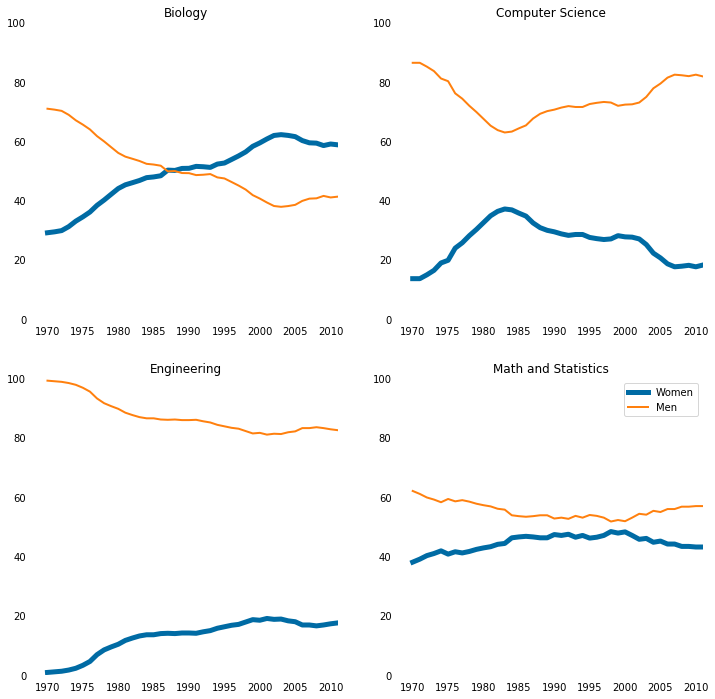

In [15]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], 
            c=cb_dark_blue, label='Women',linewidth=5) # linewidth=5
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], 
            c=cb_orange, label='Men',linewidth=2)  # linewidth=2
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

In [16]:
# Improve The Layout And Ordering

- To visualize all six STEM degrees, 2 by 2 subplot grid is not enough
- To make the viewing experience more coherent: 1.use layout of a single row with multiple columns 2. order the plots in decreasing order of initial gender gap

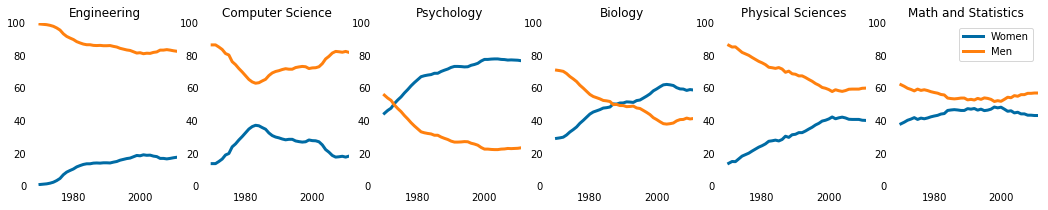

In [21]:
stem_cats = ['Engineering', 'Computer Science', 
             'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))
# Change the width of the figure to a width of 18 inches and a height of 3 inches

for sp in range(0,6): 
    # in the for loop, change the range to (0,6) instead of (0,4)
    ax = fig.add_subplot(1,6,sp+1) 
    # Change the subplot layout from 2 rows by 2 columns to 1 row by 6 columns.
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

In [23]:
# Replacing The Legend With Annotations -- can be conveyed in a cleaner way

In [24]:
# Annotating In Matplotlib -- .text(x,y,s) s:the text in the annotation (as a string value)

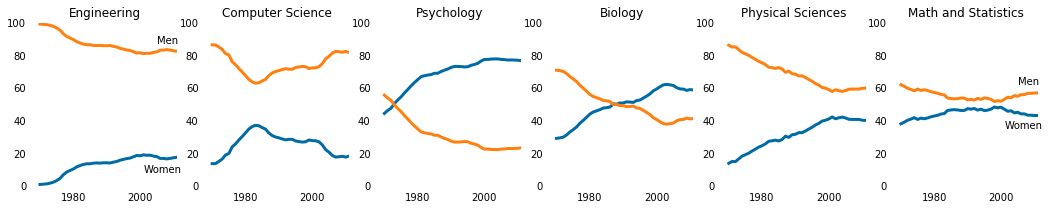

In [26]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')  # set first plot
        ax.text(2001, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')  # set last plot
        ax.text(2001, 35, 'Women')
plt.show()